In [1]:
import sys
print(sys.executable)
print(sys.path)
!{sys.executable} -m pip install groq --upgrade

from groq import Groq

client = Groq(api_key="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")  



C:\Users\Lisha\anaconda3\python.exe
['C:\\code\\ML_Learning\\ab_test_ai_agent\\notebooks', 'C:\\Users\\Lisha\\anaconda3\\python312.zip', 'C:\\Users\\Lisha\\anaconda3\\DLLs', 'C:\\Users\\Lisha\\anaconda3\\Lib', 'C:\\Users\\Lisha\\anaconda3', '', 'C:\\Users\\Lisha\\anaconda3\\Lib\\site-packages', 'C:\\Users\\Lisha\\anaconda3\\Lib\\site-packages\\win32', 'C:\\Users\\Lisha\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\Lisha\\anaconda3\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\Lisha\\anaconda3\\Lib\\site-packages\\setuptools\\_vendor']


In [2]:
import os
print(os.getcwd())
sys.path.append(os.path.abspath('..'))
# Verify
print(sys.path[-1])

C:\code\ML_Learning\ab_test_ai_agent\notebooks
C:\code\ML_Learning\ab_test_ai_agent


In [3]:
import pandas as pd
from src.data_loader import load_data, prepare_aggregates
from src.statistical_tests import cal_lift_stats
from src.ai_agent import generate_ai_insights
from src.visualize import plot_conversion_by_variant, plot_metric_distribution

In [4]:
df = load_data('../data/sample_ab_test.csv')
agg, summary = prepare_aggregates(df)
agg


,variant,users,conversions,conversion_rate,metric_mean
0,A,987,88,0.089159,99.974349
1,B,1013,130,0.128332,104.294922


In [5]:
results = cal_lift_stats(df)
results


{'control': 'A',
 'treatment': 'B',
 'n_control': 987,
 'n_treatment': 1013,
 'conv_control': 88,
 'conv_treatment': 130,
 'rate_control': 0.08915906788247213,
 'rate_treatment': 0.12833168805528133,
 'lift': 0.4393565467109396,
 'z': 2.810469145198619,
 'p_value': 0.0049469331960907414,
 'ttest': {'statistic': -4.796340087123595, 'pvalue': 1.73547871749849e-06}}

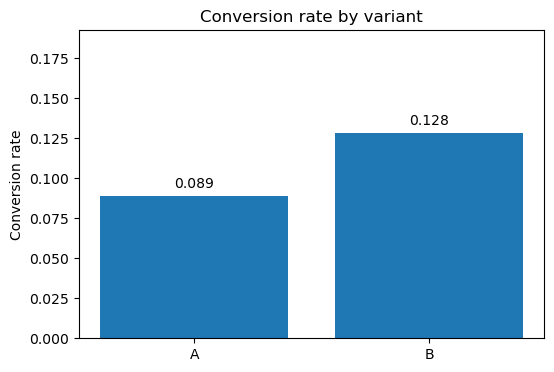

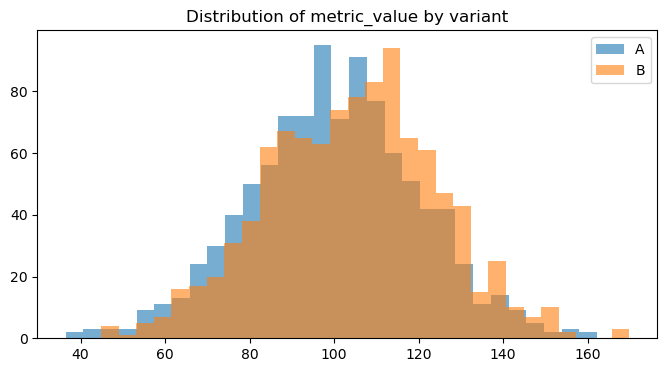

In [6]:
plot_conversion_by_variant(df)
plot_metric_distribution(df)


In [7]:
insight =  generate_ai_insights(results)
print(insight)


# Executive Summary
The experiment results indicate a statistically significant increase in conversion rates between the control group (A) and the treatment group (B), with a lift of 43.94%. The treatment group outperformed the control group, suggesting that the changes made had a positive impact. This increase is likely due to the differences between A and B.

# Interpretation of Significance and Effect Size
The p-value of 0.0049 is below the typical significance threshold of 0.05, indicating that the observed difference in conversion rates is statistically significant. The z-score of 2.81 and the t-test statistic of -4.80 further support this conclusion. The effect size, as measured by the lift, is substantial at 43.94%, suggesting that the treatment had a notable impact on conversion rates.

# Actionable Recommendations
1. Implement the treatment (B) as the new standard to capitalize on the increased conversion rate.
2. Investigate the specific factors contributing to the treatment'